In [1133]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [1134]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1, random_state=2)

In [1135]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print('Shape of df: ', df.shape)
df.head()


Shape of df:  (100, 6)


,col1,col2,col3,col4,col5,target
0,-0.301526,-0.973338,-1.776535,-0.004389,-1.461301,1
1,-1.955950,-1.751003,-1.228167,0.051130,-2.109474,1
2,-2.178632,2.564818,-1.188047,-1.285214,1.752495,0
3,0.645230,-1.718281,-0.699189,-0.988034,-0.743164,1
4,-1.624545,0.743213,-1.087353,-0.799402,1.382073,0


In [1136]:
# function for row sampling
def sample_rows(df, percenet):
    return df.sample(int(percenet*df.shape[0]), replace=True, random_state=2)

In [1137]:
# function for feature sampling
import random
def sample_features(df, percent, seed=None):
    if seed is not None:
        random.seed(seed)

    feature_cols = df.columns[:-1]
    
    num_to_sample = int(percent*len(feature_cols))
    cols = random.sample(list(feature_cols), num_to_sample, seed)
    new_df = df[cols].copy()
    new_df['target'] = df['target']
    return new_df

In [1138]:
# combined both row and column sampling 
def combined_sampling(df, row_percent, column_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, column_percent)

In [1139]:
from sklearn.tree import DecisionTreeClassifier

### 1. Row sampling

In [1140]:
df1 = sample_rows(df, 0.5)
df1.head()

,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1141]:
df2 = sample_rows(df, 0.5)
df2.head()


,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1142]:
df3 = sample_rows(df, 0.5)
df3.head()

,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1143]:
dt1 = DecisionTreeClassifier(random_state=2)
dt2 = DecisionTreeClassifier(random_state=2)
dt3 = DecisionTreeClassifier(random_state=2)

In [1144]:
df1.head()

,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1145]:
df2.head()

,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1146]:
df3.head()

,col1,col2,col3,col4,col5,target
40,-1.907169,-1.248650,0.771332,-1.988250,1.386146,1
15,-1.251003,-0.404004,-1.536664,-0.358287,-2.641195,1
72,0.796749,-1.740096,-1.351170,0.380015,0.070666,1
22,0.255901,2.586590,-2.039451,-1.427832,0.350905,0
43,-1.678528,-0.058455,0.348722,-2.848000,1.183674,1


In [1147]:
# train all the model of dt 
dt1.fit(df1.iloc[:,0:-1], df1.iloc[:,-1])
dt2.fit(df2.iloc[:,0:-1], df2.iloc[:,-1])
dt3.fit(df3.iloc[:,0:-1], df3.iloc[:,-1])

DecisionTreeClassifier(random_state=2)

In [1148]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.9, 'x[4] <= -0.262\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'x[1] <= -0.944\ngini = 0.284\nsamples = 35\nvalue = [29.0, 6.0]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -3.484\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= -0.379\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.7777777777777778, 0.3, 'x[4] <= 1.405\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 4\

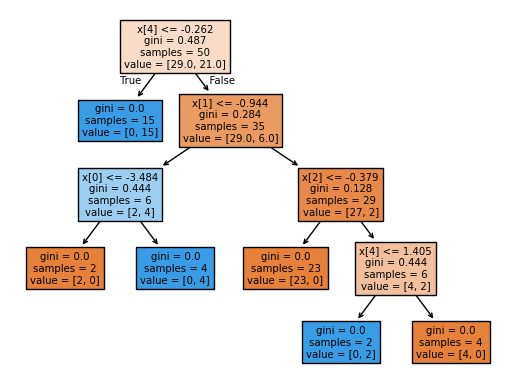

In [1149]:
plot_tree(dt1, filled=True)

[Text(0.3333333333333333, 0.9, 'x[4] <= -0.262\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'x[1] <= -0.944\ngini = 0.284\nsamples = 35\nvalue = [29.0, 6.0]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -3.484\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= -0.379\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.7777777777777778, 0.3, 'x[4] <= 1.405\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 4\

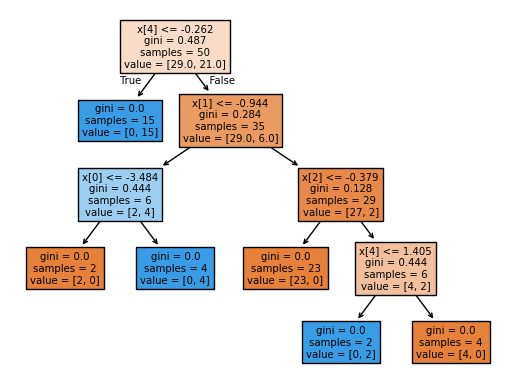

In [1150]:
plot_tree(dt2, filled=True)

[Text(0.3333333333333333, 0.9, 'x[4] <= -0.262\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'x[1] <= -0.944\ngini = 0.284\nsamples = 35\nvalue = [29.0, 6.0]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -3.484\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= -0.379\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.7777777777777778, 0.3, 'x[4] <= 1.405\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 4\

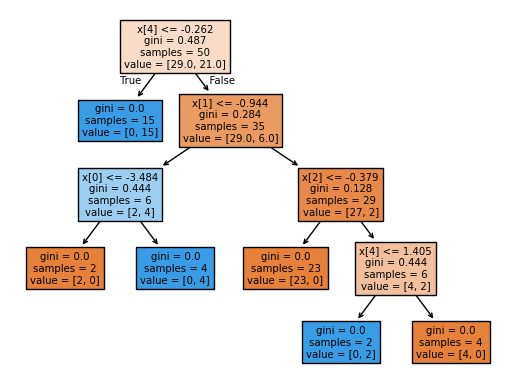

In [1151]:
plot_tree(dt3, filled=True)

In [1152]:
dt1.predict(np.array([-1.073618,	0.465813,	1.018226,	1.036482,	1.539653]).reshape(1,5))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1153]:
dt2.predict(np.array([-1.073618,	0.465813,	1.018226,	1.036482,	1.539653]).reshape(1,5))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1154]:
dt3.predict(np.array([-1.073618,	0.465813,	1.018226,	1.036482,	1.539653	]).reshape(1,5))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1155]:
df.tail()

,col1,col2,col3,col4,col5,target
95,1.133865,3.173722,-0.451011,-2.935149,0.329508,0
96,-2.156936,0.939724,-0.788736,-1.177397,2.546215,0
97,-1.995515,-1.143652,-0.494416,-1.781169,-0.733394,1
98,-1.347301,-0.702945,-1.050142,-0.557024,-1.443729,1
99,-1.375584,0.273901,-0.336997,-0.760551,0.872281,0


### 2. Column Sampling

In [1156]:
df_col1 = sample_features(df, 0.5)
df_col2 = sample_features(df, 0.5)
df_col3 = sample_features(df, 0.5)

print(df_col1.columns)
print(df_col2.columns)
print(df_col3.columns)

TypeError: sample() takes 3 positional arguments but 4 were given

In [ ]:
dt_col1 = DecisionTreeClassifier(random_state=2)
dt_col2 = DecisionTreeClassifier(random_state=2)
dt_col3 = DecisionTreeClassifier(random_state=2)

In [ ]:
dt_col1.fit(df_col1.iloc[:,0:-1], df_col1.iloc[:,-1])
dt_col2.fit(df_col2.iloc[:,0:-1], df_col2.iloc[:,-1])
dt_col3.fit(df_col3.iloc[:,0:-1], df_col3.iloc[:,-1])

DecisionTreeClassifier(random_state=2)

[Text(0.5357142857142857, 0.9166666666666666, 'x[1] <= -0.343\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2619047619047619, 0.75, 'x[0] <= -2.426\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.39880952380952384, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= -0.998\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[0] <= -3.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.047619047619047616, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.19047619047619047, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.38095238095238093, 0.5833333333333334, 'x[0] <= -1.963\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[0] <= -1.977\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.23809523809523808, 0.25, 'gini = 0.0\nsamples = 5

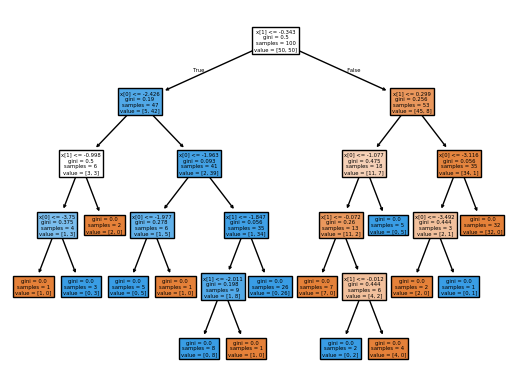

In [ ]:
plot_tree(dt_col1, filled=True)

[Text(0.806640625, 0.9615384615384616, 'x[1] <= 0.266\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.67578125, 0.8846153846153846, 'x[0] <= -2.06\ngini = 0.494\nsamples = 83\nvalue = [46, 37]'),
 Text(0.7412109375, 0.9230769230769231, 'True  '),
 Text(0.64453125, 0.8076923076923077, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.70703125, 0.8076923076923077, 'x[0] <= 0.095\ngini = 0.484\nsamples = 78\nvalue = [46, 32]'),
 Text(0.6015625, 0.7307692307692307, 'x[0] <= -0.686\ngini = 0.496\nsamples = 68\nvalue = [37, 31]'),
 Text(0.484375, 0.6538461538461539, 'x[0] <= -0.923\ngini = 0.47\nsamples = 45\nvalue = [28, 17]'),
 Text(0.453125, 0.5769230769230769, 'x[1] <= -0.128\ngini = 0.492\nsamples = 39\nvalue = [22, 17]'),
 Text(0.421875, 0.5, 'x[0] <= -0.971\ngini = 0.5\nsamples = 34\nvalue = [17, 17]'),
 Text(0.390625, 0.4230769230769231, 'x[1] <= -0.714\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.28125, 0.34615384615384615, 'x[0] <= -1.315\ngini = 0.49\nsamples

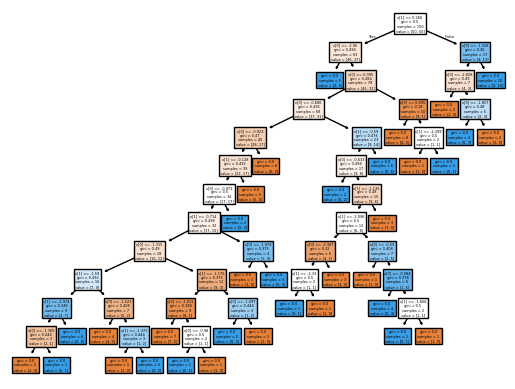

In [ ]:
plot_tree(dt_col2, filled=True)

[Text(0.806640625, 0.9615384615384616, 'x[0] <= 0.266\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.67578125, 0.8846153846153846, 'x[1] <= -2.06\ngini = 0.494\nsamples = 83\nvalue = [46, 37]'),
 Text(0.7412109375, 0.9230769230769231, 'True  '),
 Text(0.64453125, 0.8076923076923077, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.70703125, 0.8076923076923077, 'x[1] <= 0.095\ngini = 0.484\nsamples = 78\nvalue = [46, 32]'),
 Text(0.6015625, 0.7307692307692307, 'x[1] <= -0.686\ngini = 0.496\nsamples = 68\nvalue = [37, 31]'),
 Text(0.484375, 0.6538461538461539, 'x[0] <= -0.128\ngini = 0.47\nsamples = 45\nvalue = [28, 17]'),
 Text(0.453125, 0.5769230769230769, 'x[1] <= -0.917\ngini = 0.492\nsamples = 39\nvalue = [22, 17]'),
 Text(0.421875, 0.5, 'x[1] <= -0.971\ngini = 0.5\nsamples = 34\nvalue = [17, 17]'),
 Text(0.390625, 0.4230769230769231, 'x[0] <= -0.714\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.28125, 0.34615384615384615, 'x[1] <= -1.315\ngini = 0.49\nsamples

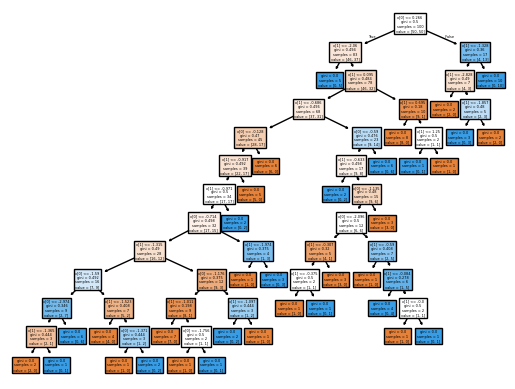

In [ ]:
plot_tree(dt_col3, filled=True)

In [ ]:
dt_col1.predict(np.array([1.630629,	-2.361422]).reshape(1,2))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
dt_col2.predict(np.array([1.630629,	-2.361422]).reshape(1,2))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
dt_col3.predict(np.array([1.630629,	-2.361422]).reshape(1,2))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.tail()

,col1,col2,col3,col4,col5,target
95,1.133865,3.173722,-0.451011,-2.935149,0.329508,0
96,-2.156936,0.939724,-0.788736,-1.177397,2.546215,0
97,-1.995515,-1.143652,-0.494416,-1.781169,-0.733394,1
98,-1.347301,-0.702945,-1.050142,-0.557024,-1.443729,1
99,-1.375584,0.273901,-0.336997,-0.760551,0.872281,0


### 3. Row and column both sampling

In [ ]:
df_both1 = combined_sampling(df, 0.4, 0.6)
df_both2 = combined_sampling(df, 0.4, 0.6)
df_both3 = combined_sampling(df, 0.4, 0.6)
df_both1.shape
df_both2.shape
df_both3.shape

(40, 4)

In [ ]:
dt_both1 = DecisionTreeClassifier()
dt_both2 = DecisionTreeClassifier()
dt_both3 = DecisionTreeClassifier()

In [ ]:
dt_both1.fit(df_both1.iloc[:,0:-1], df_both1.iloc[:,-1])
dt_both2.fit(df_both2.iloc[:,0:-1], df_both2.iloc[:,-1])
dt_both3.fit(df_both3.iloc[:,0:-1], df_both3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.375, 0.9, 'x[0] <= -0.262\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[1] <= -0.442\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'x[2] <= 0.379\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.375, 0.3, 'x[2] <= 0.382\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[0] <= 1.507\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

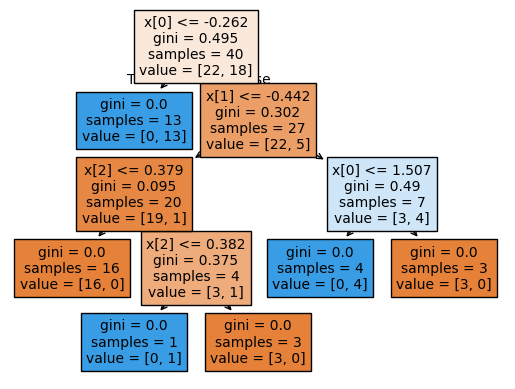

In [ ]:
plot_tree(dt_both1, filled=True)

[Text(0.5555555555555556, 0.9166666666666666, 'x[2] <= 0.319\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.4444444444444444, 0.75, 'x[0] <= -1.938\ngini = 0.375\nsamples = 24\nvalue = [6, 18]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'x[1] <= -0.705\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[2] <= -1.324\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.25, 'x[1] <= 0.061\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[2] <= -0.294\ngini = 0.117\nsamples = 16\nvalue

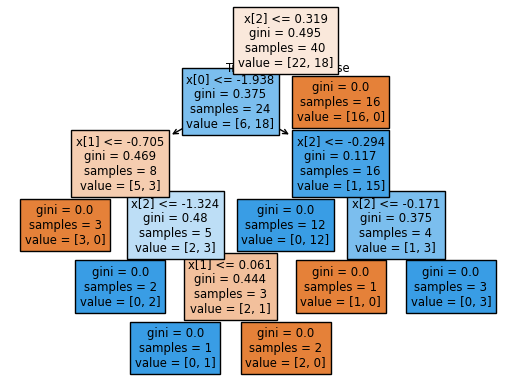

In [ ]:
plot_tree(dt_both2, filled=True)

[Text(0.3333333333333333, 0.9, 'x[2] <= -0.262\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'x[1] <= -0.944\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'x[1] <= -2.104\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= -0.379\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 1.405\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 3\nvalue = 

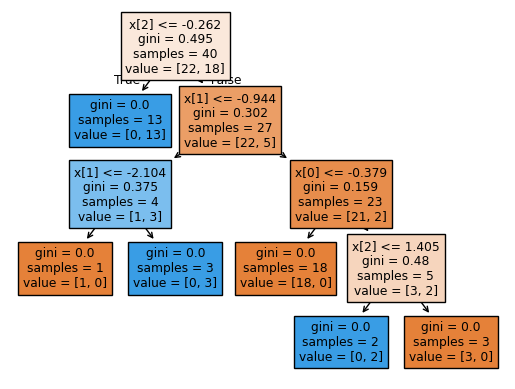

In [ ]:
plot_tree(dt_both3, filled=True)

In [ ]:
df

,col1,col2,col3,col4,col5,target
0,-0.301526,-0.973338,-1.776535,-0.004389,-1.461301,1
1,-1.955950,-1.751003,-1.228167,0.051130,-2.109474,1
2,-2.178632,2.564818,-1.188047,-1.285214,1.752495,0
3,0.645230,-1.718281,-0.699189,-0.988034,-0.743164,1
4,-1.624545,0.743213,-1.087353,-0.799402,1.382073,0
...,...,...,...,...,...,...
95,1.133865,3.173722,-0.451011,-2.935149,0.329508,0
96,-2.156936,0.939724,-0.788736,-1.177397,2.546215,0
97,-1.995515,-1.143652,-0.494416,-1.781169,-0.733394,1
98,-1.347301,-0.702945,-1.050142,-0.557024,-1.443729,1


In [ ]:
dt_both1.predict(np.array([-0.726030,	-0.514004,	0.468595]).reshape(1,3))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
dt_both2.predict(np.array([-0.726030,	-0.514004,	0.468595]).reshape(1,3))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
dt_both3.predict(np.array([-0.726030,	-0.514004,	0.468595]).reshape(1,3))

c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])